Se solicita, diseñar e implementar una CNN capaz de clasiciar una foto de flor iris.


Primero, se instalan las dependencias necesarias para realizar este trabajo.


In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


*PREGUNTA 1.- CNN PARA CLASIFICAR*

In [2]:


import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import os
import pathlib

## Defining batch specfications
batch_size = 10
img_height = 224
img_width = 224

data_dir = pathlib.Path('images')


## Se cargan los datos de entrenamiento correspondientes
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset= "training",
  seed=42,
  image_size= (img_height, img_width),
  batch_size=batch_size

)

## Se cargan los datos de testeo crrespondiente.
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset= "validation",
  seed=42,
  image_size= (img_height, img_width),
  batch_size=batch_size

)

class_names = training_ds.class_names


## Configuracion correspondiente del dataset.
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Se define el CNN
MyCnn = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Se entrena la CNN
retVal = MyCnn.fit(training_ds,validation_data= validation_ds,epochs = 10)


Found 421 files belonging to 3 classes.
Using 337 files for training.
Found 421 files belonging to 3 classes.
Using 84 files for validation.
Epoch 1/10
34/34 [==============================] - 21s 575ms/step - loss: 2.0219 - accuracy: 0.5964 - val_loss: 1.0329 - val_accuracy: 0.6548
Epoch 2/10
34/34 [==============================] - 19s 554ms/step - loss: 0.9781 - accuracy: 0.6083 - val_loss: 0.8965 - val_accuracy: 0.6548
Epoch 3/10
34/34 [==============================] - 17s 505ms/step - loss: 0.8753 - accuracy: 0.6380 - val_loss: 1.0581 - val_accuracy: 0.6190
Epoch 4/10
34/34 [==============================] - 19s 546ms/step - loss: 0.7833 - accuracy: 0.6944 - val_loss: 0.9036 - val_accuracy: 0.5833
Epoch 5/10
34/34 [==============================] - 18s 525ms/step - loss: 0.6899 - accuracy: 0.7151 - val_loss: 1.0376 - val_accuracy: 0.5357
Epoch 6/10
34/34 [==============================] - 17s 506ms/step - loss: 0.5846 - accuracy: 0.7745 - val_loss: 1.3111 - val_accuracy: 0.4643
E

Se mostrarán en pantalla los resultados obtenidos

1/1 [==============================] - 0s 198ms/step


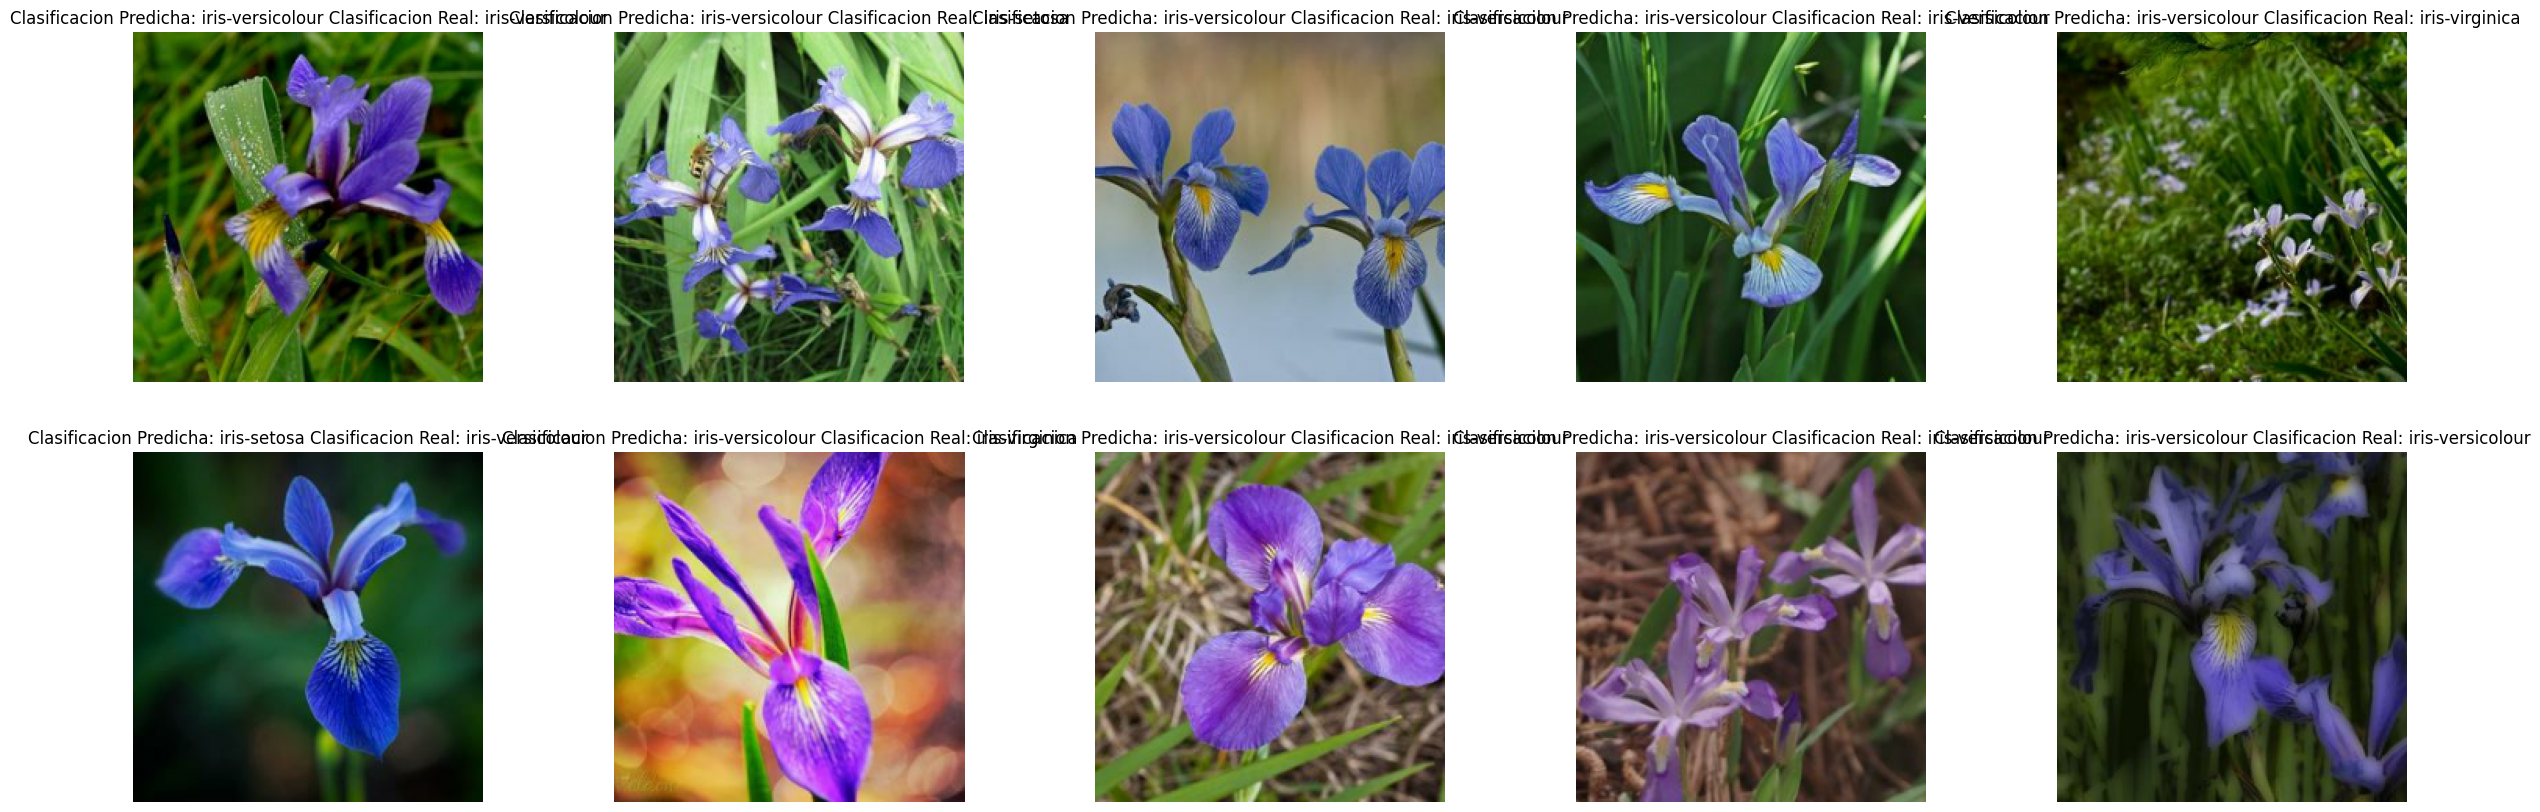

In [3]:

plt.figure(figsize=(30, 10))
for images, labels in validation_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(10):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Clasificacion Predicha: '+ predlabel[i]+' Clasificacion Real: '+class_names[labels[i]])
        plt.axis('off')
        plt.grid(True)

Ve graficamente, cuanto es el error aproximado por cada imagen. Esto da una impresion de la calidad de CNN que fue implementada. 

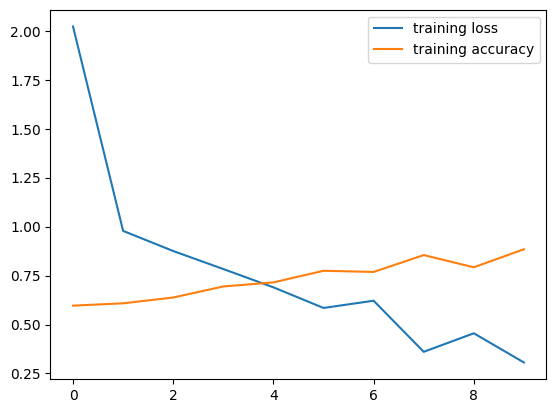

In [4]:
## Perdida de entrenamiento
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.legend()

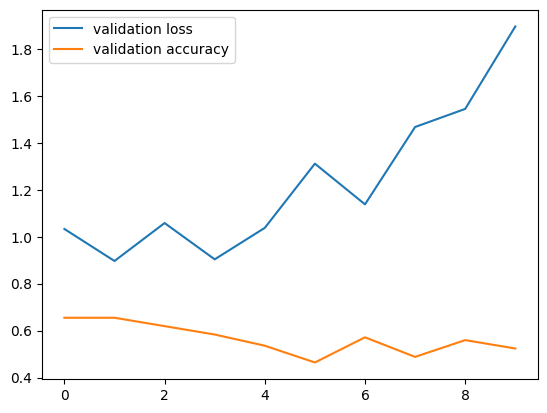

In [5]:
## validation loss and accuracy 
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

In [ ]:
target_dir = './modelo/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
MyCnn.save('./modelo/modelo.h5')
MyCnn.save_weights('./modelo/pesos.h5')

*PREGUNTA 1.- CODIGO EXTRA PARA PODER INGRESAR UNA IMAGEN DE IRIS Y QUE LA CLASIFIQUE.*

In [ ]:
import numpy as np
#from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

longitud, altura = 224, 224
modelo = './modelo/modelo.h5'
pesos_modelo = './modelo/pesos.h5'
cnn = load_model(modelo)
cnn.load_weights(pesos_modelo)

def predict(file):
  x = load_img(file, target_size=(longitud, altura))
  x = img_to_array(x)
  x = np.expand_dims(x, axis=0)
  array = cnn.predict(x)
  result = array[0]
  answer = np.argmax(result)
  if answer == 0:
    print("pred: Iris-Setosa")
  elif answer == 1:
    print("pred: Iris-Versicolour")
  elif answer == 2:
    print("pred: Iris-Virginica")

  return answer

predict('./images/')